In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
kickstarter = pd.read_csv('kickstarter_cleaned_index.csv')
kickstarter.columns

Index(['Unnamed: 0', 'ID', 'name', 'category', 'main_category', 'currency',
       'deadline', 'goal', 'launched', 'state', 'backers', 'country',
       'usd_pledged_real', 'usd_goal_real', 'project_length',
       'pledged_per_backer'],
      dtype='object')

In [2]:
kickstarter = kickstarter.drop(columns='Unnamed: 0')

kickstarter.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'state', 'backers', 'country', 'usd_pledged_real',
       'usd_goal_real', 'project_length', 'pledged_per_backer'],
      dtype='object')

## Data Cleaning

In [3]:
kickstarter.sort_values(by='deadline').tail()

,ID,name,category,main_category,currency,deadline,goal,launched,state,backers,country,usd_pledged_real,usd_goal_real,project_length,pledged_per_backer
61309,1365286494,From the Wilderness,Drama,Film & Video,USD,2018-03-02 00:00:00,2500.0,2018-01-01 02:30:11,live,19,US,482.00,2500.00,59,25.368421
301869,872683023,The Lewisham Ledger - a new free local communi...,Print,Journalism,GBP,2018-03-02 00:00:00,5000.0,2018-01-01 21:20:35,live,7,GB,477.39,6819.89,59,68.198571
222480,396064457,Deaths of Athazar,Games,Games,USD,2018-03-02 00:00:00,15000.0,2018-01-01 13:27:13,live,1,US,1.00,15000.00,59,1.000000
134188,1799225301,"Accurate Beats: My Album ""Collage"" on Vinyl!",Hip-Hop,Music,SEK,2018-03-02 00:00:00,14000.0,2018-01-01 10:35:25,live,16,SE,557.80,1727.69,59,34.862500
6130,1036415983,Aikyam : Onnu,Music,Music,USD,2018-03-03 00:00:00,10000.0,2018-01-02 08:11:58,live,3,US,174.00,10000.00,59,58.000000


### Check for Missing Values 

In [4]:
print(kickstarter.isnull().any())

ID                    False
name                  False
category              False
main_category         False
currency              False
deadline              False
goal                  False
launched              False
state                 False
backers               False
country               False
usd_pledged_real      False
usd_goal_real         False
project_length        False
pledged_per_backer    False
dtype: bool


### Data Types 

In [5]:
print(kickstarter.dtypes)

ID                      int64
name                   object
category               object
main_category          object
currency               object
deadline               object
goal                  float64
launched               object
state                  object
backers                 int64
country                object
usd_pledged_real      float64
usd_goal_real         float64
project_length          int64
pledged_per_backer    float64
dtype: object


We converted deadline and launched date to a date-time type. 

In [6]:
kickstarter['deadline'] = pd.to_datetime(kickstarter.deadline)
kickstarter['launched'] = pd.to_datetime(kickstarter.launched)
type(kickstarter.deadline[0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
kickstarter['year_launched'] = kickstarter.launched.dt.year
kickstarter['month_launched'] = kickstarter.launched.dt.month

## Summary Statistics 

In [8]:
print(kickstarter.state.value_counts())

0            158968
1            133851
canceled      26744
live           2250
suspended      1230
Name: state, dtype: int64


### Relationships 

In [9]:
# category, main_category, currency, deadline/launched - year,month

#### Main Category

In [10]:
projects = kickstarter[(kickstarter['state'] == '0') | (kickstarter['state'] == '1')]

grouped = projects.groupby(['main_category','state']).ID.count()
total = projects.groupby('main_category').state.count()
prop = np.round((grouped/total),2).unstack().sort_values(by='1')
#print(prop.std())
#print(prop.mean()) 
print(prop) # all proportions within 2 std deviations

state             0     1
main_category            
Technology     0.72  0.28
Journalism     0.69  0.31
Crafts         0.68  0.32
Food           0.68  0.32
Fashion        0.66  0.34
Photography    0.60  0.40
Publishing     0.59  0.41
Design         0.56  0.44
Games          0.54  0.46
Film & Video   0.52  0.48
Art            0.49  0.51
Music          0.41  0.59
Comics         0.39  0.61
Theater        0.32  0.68
Dance          0.31  0.69


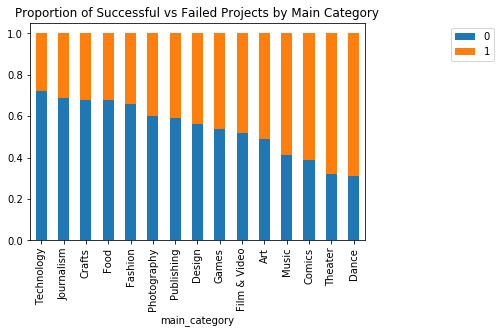

In [11]:
prop.plot(kind='bar',stacked=True)
plt.title('Proportion of Successful vs Failed Projects by Main Category')
plt.legend(loc='upper right',bbox_to_anchor=(1.4,1))
plt.show()

#### Currency 

In [12]:
projects.currency.value_counts()

grouped = projects.groupby(['currency','state']).ID.count()
total = projects.groupby('currency').state.count()
prop = np.round((grouped/total),2).unstack().sort_values(by='1')

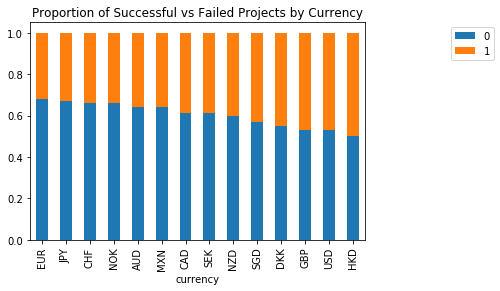

In [13]:
prop.plot(kind='bar',stacked=True)
plt.title('Proportion of Successful vs Failed Projects by Currency')
plt.legend(loc='upper right',bbox_to_anchor=(1.4,1))
plt.show()

#### Year Launched 

In [21]:
print(projects.year_launched.value_counts().sort_index())

2009     1026
2010     8396
2011    21783
2012    35339
2013    38682
2014    51637
2015    53018
2016    43919
2017    39019
Name: year_launched, dtype: int64


In [16]:
projects.year_launched.value_counts().sort_index()

grouped = projects.groupby(['year_launched','state']).ID.count()
total = projects.groupby('year_launched').state.count()
prop = np.round((grouped/total),2).unstack().sort_values(by='1')
prop = prop.sort_index()
prop

state,0,1
year_launched,,
2009,0.44,0.56
2010,0.45,0.55
2011,0.44,0.56
2012,0.49,0.51
2013,0.50,0.50
2014,0.59,0.41
2015,0.60,0.40
2016,0.57,0.43
2017,0.53,0.47


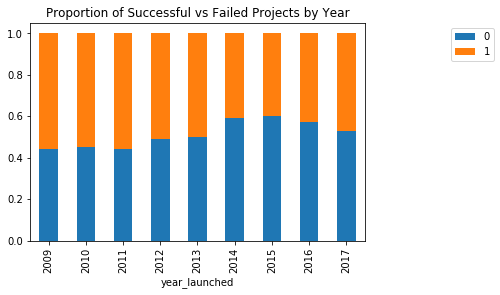

In [17]:
prop.plot(kind='bar',stacked=True)
plt.title('Proportion of Successful vs Failed Projects by Year')
plt.legend(loc='upper right',bbox_to_anchor=(1.4,1))
plt.show()

From the graph, it appears that the overall success rate for all projects have decreased over the years. This is also due to the increase of number of projects on Kickstarter since 2014.

#### Month Launched 

In [18]:
kickstarter.month_launched.value_counts().sort_index()

grouped = projects.groupby(['month_launched','state']).ID.count()
total = projects.groupby('month_launched').state.count()
prop = np.round((grouped/total),2).unstack().sort_values(by='1')
prop = prop.sort_index()
prop

state,0,1
month_launched,,
1,0.56,0.44
2,0.53,0.47
3,0.52,0.48
4,0.52,0.48
5,0.53,0.47
6,0.54,0.46
7,0.57,0.43
8,0.56,0.44
9,0.54,0.46


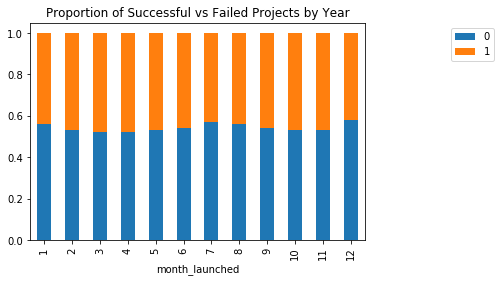

In [19]:
prop.plot(kind='bar',stacked=True)
plt.title('Proportion of Successful vs Failed Projects by Year')
plt.legend(loc='upper right',bbox_to_anchor=(1.4,1))
plt.show()

#### Comparing Relaunched Projects

In [36]:
names = kickstarter.name.value_counts()
names[names==2].count()
names[names==2].head(10)

Logo Design                  2
The Club                     2
Battleground                 2
One                          2
Made From The Heart Mixes    2
The Seven                    2
REVIVAL                      2
Homecoming                   2
Bounty Hunter: Beauty        2
Are You Listening?           2
Name: name, dtype: int64

In [54]:
kickstarter[kickstarter['name'] == 'Nokï Baby Bottle Adapter'].sort_values(by='launched')

,ID,name,category,main_category,currency,deadline,goal,launched,state,backers,country,usd_pledged_real,usd_goal_real,project_length,pledged_per_backer,year_launched,month_launched
27733,1164363374,Nokï Baby Bottle Adapter,Product Design,Design,USD,2016-11-01,30000.0,2016-09-02 21:02:45,canceled,49,US,2613.0,30000.0,59,53.326531,2016,9
76822,1457070257,Nokï Baby Bottle Adapter,Product Design,Design,USD,2016-12-18,15000.0,2016-11-02 23:53:38,0,34,US,1614.0,15000.0,45,47.470588,2016,11


In [129]:
repeat = kickstarter[kickstarter.duplicated(['name', 'category','country'],keep=False)]

counts = repeat.name.value_counts()
twice = counts[counts == 2]
twice = list(twice.index)
print(len(twice)) # 716 exact projects that repeated twice

duplicated = repeat[repeat.name.isin(twice)].sort_values(by=['name','launched'])
duplicated.reset_index()
duplicated.head(10)

423


,ID,name,category,main_category,currency,deadline,goal,launched,state,backers,country,usd_pledged_real,usd_goal_real,project_length,pledged_per_backer,year_launched,month_launched
101928,1606189204,"""The Book of Sam"" Book One Graphic Novel",Comics,Comics,USD,2017-02-05,5000.0,2017-01-06 01:55:34,canceled,1,US,5.0,5000.0,29,5.000000,2017,1
27898,1165257902,"""The Book of Sam"" Book One Graphic Novel",Comics,Comics,USD,2017-02-09,300.0,2017-01-10 17:09:27,0,10,US,111.0,300.0,29,11.100000,2017,1
54430,1323699879,1000 Paper Cranes,Crafts,Crafts,USD,2014-09-06,1000.0,2014-07-08 19:32:28,0,5,US,6.0,1000.0,59,1.200000,2014,7
202968,279477490,1000 Paper Cranes,Crafts,Crafts,USD,2015-08-21,650.0,2015-07-22 00:07:53,0,19,US,199.0,650.0,29,10.473684,2015,7
177944,2062423380,12 Days of Chocolate - Xmas Advent Calendar,Food,Food,USD,2016-12-12,3500.0,2016-11-17 19:42:48,canceled,1,US,35.0,3500.0,24,35.000000,2016,11
130043,1773390132,12 Days of Chocolate - Xmas Advent Calendar,Food,Food,USD,2016-12-05,3500.0,2016-11-21 08:46:28,1,19,US,3593.0,3500.0,13,189.105263,2016,11
317718,96794570,12 Realms: Dungeonland,Tabletop Games,Games,USD,2017-06-05,55000.0,2017-05-15 15:59:45,canceled,300,US,29863.0,55000.0,20,99.543333,2017,5
180949,2080553542,12 Realms: Dungeonland,Tabletop Games,Games,USD,2017-06-27,30000.0,2017-06-02 01:48:29,1,400,US,44631.0,30000.0,24,111.577500,2017,6
157771,1940823267,29 Linens || Reinvent Your Rest w/ Copper-Infu...,Product Design,Design,USD,2017-02-15,12000.0,2017-01-10 01:05:06,canceled,85,US,13978.0,12000.0,35,164.447059,2017,1
104360,1620528874,29 Linens || Reinvent Your Rest w/ Copper-Infu...,Product Design,Design,USD,2017-02-16,12000.0,2017-01-16 15:02:09,1,625,US,110551.0,12000.0,30,176.881600,2017,1


In [ ]:
first_instance = duplicated.drop_duplicates(['name','category','country'],keep='first')
first_instance.shape

second_instance = duplicated.drop_duplicates(['name','category','country'],keep='last')
second_instance.shape

In [123]:
first_instance.main_category.value_counts()

Games           113
Film & Video     86
Design           60
Technology       33
Publishing       23
Theater          21
Food             19
Music            16
Art              12
Crafts           11
Photography      10
Fashion           9
Comics            7
Dance             2
Journalism        1
Name: main_category, dtype: int64

In [124]:
first_instance.head(10)
first_instance.state.value_counts()

canceled     236
0            102
1             80
suspended      5
Name: state, dtype: int64

In [125]:
second_instance.state.value_counts()

1            195
0            168
canceled      49
live           8
suspended      3
Name: state, dtype: int64

Some main categories are more precise than other categories. If the sub categories are more different and precise, then the model works better. 

check pledge amount is 100 times the goal - do it by category and see which category has the most outliers. 